# Neural network with two layers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fundamental functions

In [2]:
def initialisation(n0, n1, n2):
# n0 : nombre d'entrées du réseau 
# n1: nombre de neurones couche1
# n2: nombre de neurones couche 2 (sortie)

# first layer
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    
# second layer
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [3]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [4]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [5]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [7]:
def neural_network(X, y, n1=2, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        #history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


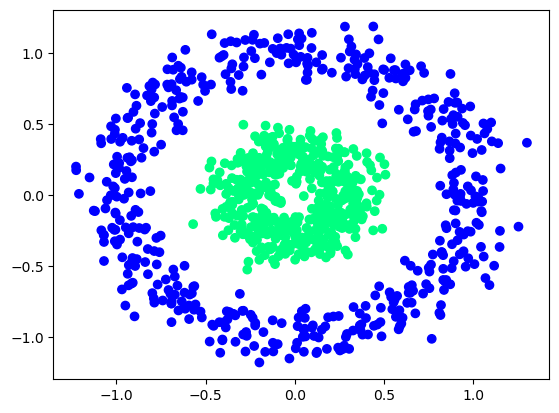

In [8]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='winter')
plt.show()

# Application of the model

In [9]:
# For the visualisation of the decision boundaries 

x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()].T

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 571.62it/s]


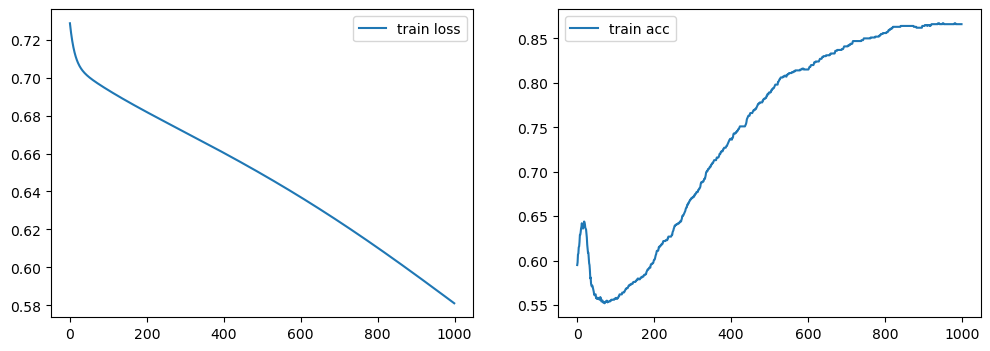

In [10]:
parameters = neural_network(X, y) 

(-1.2789354897609622, 1.289153918812958)

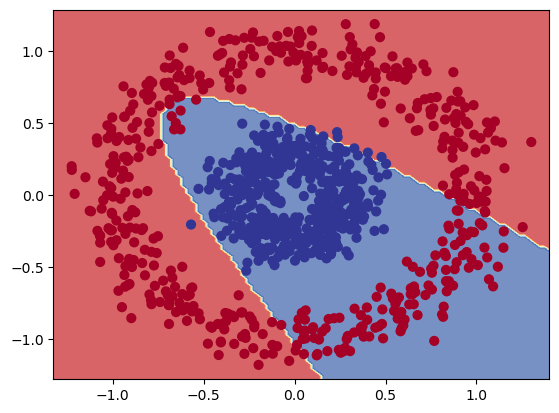

In [11]:
y_pred = predict(x_in, parameters)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X[0,:], X[1,:], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 560.77it/s]


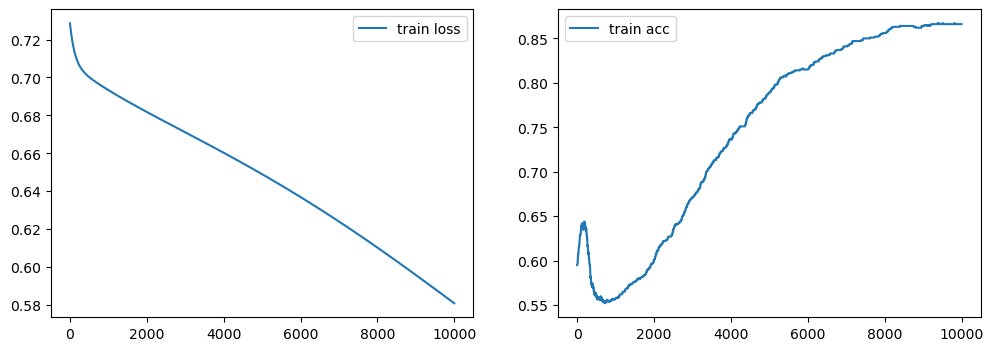

In [12]:
parameters = neural_network(X, y, n1=2,learning_rate = 0.01, n_iter = 10000) #n1=2,4,8,16,32

(-1.2789354897609622, 1.289153918812958)

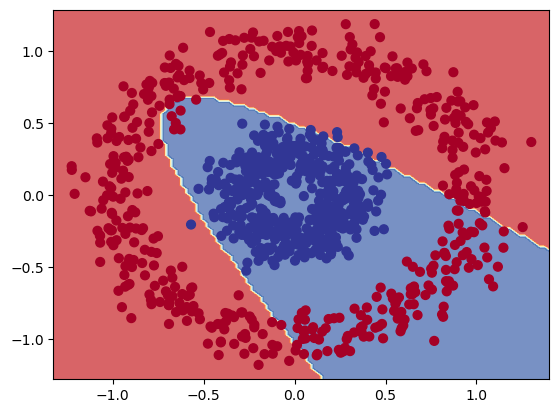

In [13]:
y_pred = predict(x_in, parameters)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X[0,:], X[1,:], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 451.57it/s]


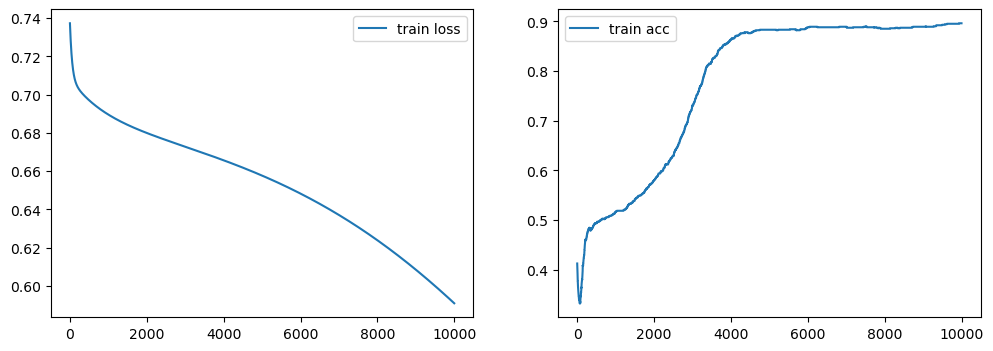

In [14]:
parameters = neural_network(X, y, n1=8,learning_rate = 0.01, n_iter = 10000) #n1=2,4,8,16,32

(-1.2789354897609622, 1.289153918812958)

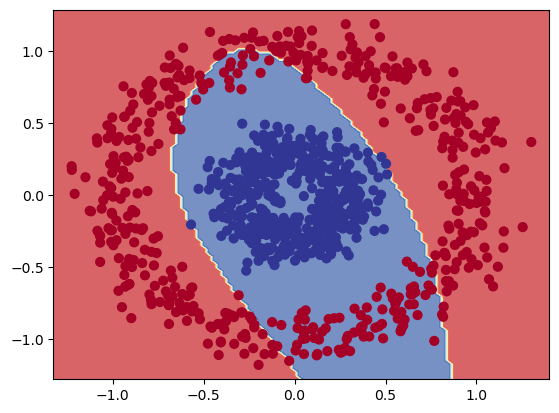

In [15]:
y_pred = predict(x_in, parameters)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X[0,:], X[1,:], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 430.49it/s]


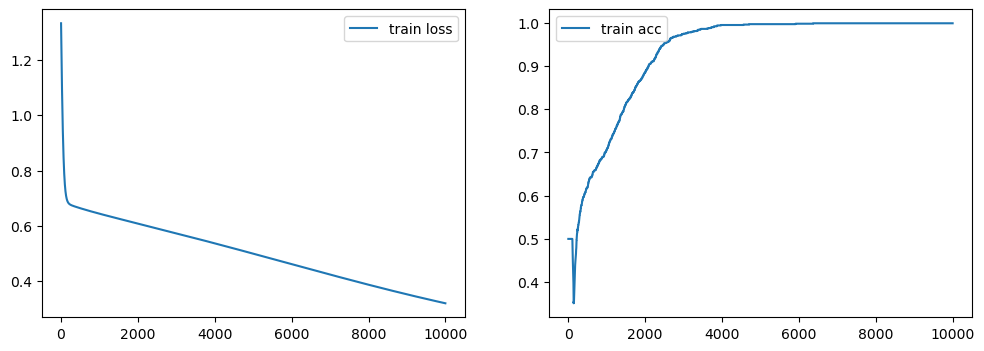

In [16]:
parameters = neural_network(X, y, n1=16,learning_rate = 0.01, n_iter = 10000) #n1=2,4,8,16,32

(-1.2789354897609622, 1.289153918812958)

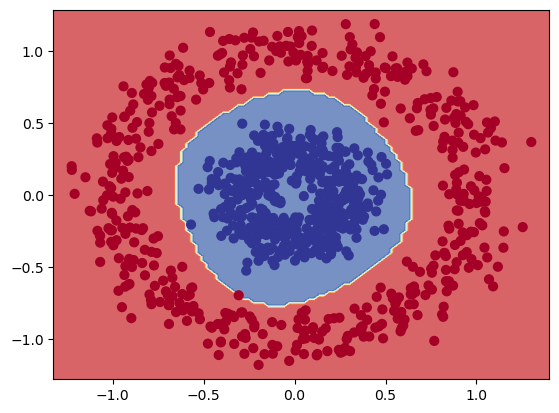

In [17]:
y_pred = predict(x_in, parameters)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X[0,:], X[1,:], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### End